In [1]:
%matplotlib inline
import numpy as np
import cv2 
import os
import matplotlib.pyplot as plt

from keras.models import Sequential, load_model
from keras.layers.convolutional import Conv2D, Deconvolution2D, UpSampling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization

from keras.layers.pooling import MaxPooling2D
from keras.layers import Activation
from keras.activations import softmax
from keras.layers.core import Reshape
from keras.callbacks import Callback

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, fbeta_score
from sklearn.model_selection import train_test_split

from experiment import generate_samples, process_label, segnet, hood_pixels_gl


Using TensorFlow backend.


In [2]:
#burl = '/Users/chiyuan/Documents/home/Train/'
burl = '/home/cy/Desktop/Train'
img_url = os.path.join(burl, "CameraRGB")
label_url = os.path.join(burl, "CameraSeg")

In [3]:
class Metrics2(Callback):
    def on_epoch_end(self, epoch, logs={}):
        print("tset", self.validation_data)
        pred = self.model.predict(self.validation_data[0]).argmax(axis=2)
        gold = self.validation_data[1]
        
        fb_2 = fbeta_score(gold, pred, average=None, beta=2)
        fb_05 = fbeta_score(gold, pred, average=None, beta=.5)
        
        print("f1 car: ", fb_2[0], " f1 road: ", fb_05[1])


In [4]:
def run():
    #metrics = Metrics2()
    
    batch_size=2
    #img_size = 
    
    xdata =  os.listdir(img_url)
    ylabel = os.listdir(label_url)
    
    #xtrain, xtest, ytrain, ytest = train_test_split(xdata, ylabel, test_size=0.2)
    xtrain, xtest, ytrain, ytest = train_test_split(xdata, ylabel, test_size=0.2)
    train_gen = generate_samples(xtrain, ytrain, batch_size=batch_size, train=True)
    test_gen = generate_samples(xtest, ytest, batch_size=batch_size)
    
    imgsize = (600, 800, 3)
    model = segnet(3, imgsize)
    runobj = model.fit_generator(train_gen,
                                samples_per_epoch= len(xtrain)//batch_size * batch_size * 2,
                                nb_epoch=12,
                                validation_data=test_gen, 
                                nb_val_samples = (len(xtest)//batch_size) * batch_size,
                                nb_worker=1,
                                verbose=1)
        
    model.save("m2")
    
    return runobj, model

#     model = load_model("m2")
    
#     pred = model.predict_generator(test_gen, len(xtest)).argmax(axis=2)
#     gold = [ydata.argmax(axis=2) for _,ydata  in generate_samples(xtest, ytest, batch_size=batch_size)]
        
#     fb_2 = fbeta_score(gold, pred, average=None, beta=2)
#     fb_05 = fbeta_score(gold, pred, average=None, beta=.5)
        
#     print("f1 car: ", fb_2[0], " f1 road: ", fb_05[1])
    
    
    
    

In [5]:
runobj, model = run()

Epoch 1/12
1600/1600 [==============================] - 365s - loss: 0.4083 - categorical_accuracy: 0.7194 - val_loss: 1.2718 - val_categorical_accuracy: 0.5638
Epoch 2/12
1600/1600 [==============================] - 357s - loss: 0.2094 - categorical_accuracy: 0.8829 - val_loss: 1.4968 - val_categorical_accuracy: 0.3456
Epoch 3/12
1600/1600 [==============================] - 358s - loss: 0.1557 - categorical_accuracy: 0.9194 - val_loss: 0.2523 - val_categorical_accuracy: 0.9517
Epoch 4/12
1600/1600 [==============================] - 359s - loss: 0.1254 - categorical_accuracy: 0.9397 - val_loss: 0.4172 - val_categorical_accuracy: 0.8613
Epoch 5/12
1600/1600 [==============================] - 359s - loss: 0.1073 - categorical_accuracy: 0.9490 - val_loss: 0.2810 - val_categorical_accuracy: 0.9175
Epoch 6/12
1600/1600 [==============================] - 368s - loss: 0.0791 - categorical_accuracy: 0.9589 - val_loss: 0.2406 - val_categorical_accuracy: 0.9381
Epoch 7/12
1600/1600 [============

In [ ]:
#run_obj, model= run()

In [ ]:
#model = load_model("m2")

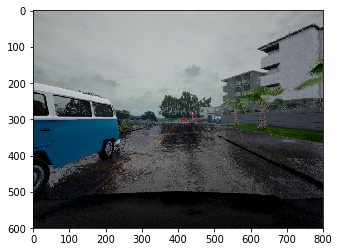

In [61]:
f = np.random.choice(os.listdir(label_url))
img = cv2.imread(os.path.join(img_url, f))
label = cv2.imread(os.path.join(label_url, f))

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

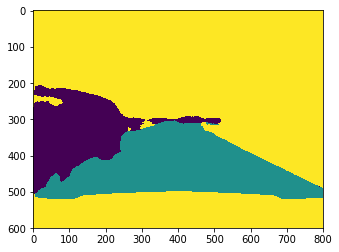

In [62]:
test_x = np.zeros((1, 600, 800, 3)).astype('float')
test_x[0, :, : ,: ] = img
test_x = test_x/255.# - 0.5
test_x[:,hood_pixels_gl[0], hood_pixels_gl[1],:] = 0
#model = load_model("m2")
test_sample = model.predict(test_x)
final = test_sample.argmax(axis=2).reshape((1, 600, 800))[0]
plt.imshow(final)

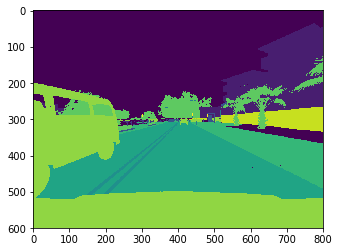

In [63]:
plt.imshow(label[:,:, 2])

In [ ]:
model = Sequential()
num_features = 64
img_shape=(600, 800, 3)

#cropping and pre-process
#model.add()
#model.add()

model.add(ZeroPadding2D((4, 0), i
                        
                        
                        
                        
                        
                        
                        
                        
                        
                        
                        
                        nput_shape=img_shape))

#encoders
model.add(Conv2D(num_features, nb_row=7, nb_col=7, subsample=(1,1), border_mode='same',))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)) )

model.add(Conv2D(num_features, nb_row=7, nb_col=7, subsample=(1,1), border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),)) 

model.add(Conv2D(num_features, nb_row=7, nb_col=7, subsample=(1,1),  border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), ))

model.add(Conv2D(num_features, nb_row=7, nb_col=7, subsample=(1,1),  border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),))

model.add(UpSampling2D(size=(2,2)))
model.add(Conv2D(num_features, nb_row=7, nb_col=7, subsample=(1,1), border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(num_features, nb_row=7, nb_col=7, subsample=(1, 1), border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(num_features, nb_row=7, nb_col=7, subsample=(1, 1), border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(3, nb_row=7, nb_col=7, subsample=(1, 1), border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

data = np.ones((1, 600, 800, 3))
model.predict(data).shape

In [42]:
np.save("mask.np", hood_pixels_gl)